***
# WorldQuant University
<b>MScFE 610 Econometrics: Group Project 1 Submission</b><br>
***

<b>Group 11 Team Members:</b>

- Beh Min Yan
- Mohammadkian Maghsoodi
- Rahul Patil

***

# 0 Selecting a data set

<br/>

**We have chosen the below Gold & Equity ETFs:**

- **Gold ETF:** SPDR Gold Shares (GLD). 
    - Source: https://finance.yahoo.com/quote/GLD/


- **Equity ETF:** Vanguard FTSE Europe Index Fund ETF Shares (VGK).
    - Source: https://finance.yahoo.com/quote/vgk/

In [1]:
GOLD_ETF = 'GLD'     # SPDR Gold Shares (GLD)
EQUITY_ETF = 'VGK'   # Vanguard FTSE Europe Index Fund ETF Shares (VGK)

START_DATE = '2019-10-01'
END_DATE = '2019-11-30'

***
# 1. Data Importing

### Import Libraries

In [2]:
# !pip install nelson_siegel_svensson

from arch import arch_model
import matplotlib.pyplot as plt
from nelson_siegel_svensson.calibrate import calibrate_ns_ols
import numpy as np
import pandas as pd
import scipy
import warnings
import yfinance as yf


warnings.filterwarnings("ignore")
pd.options.display.max_rows = 15

<b>1.1) Import closing daily interest rates of the 6 active benchmarks of US Treasury yields, for the months of October 2019 and November 2019 (approximately 40 - 45 data points).  You will likely use 2-year, 3-year, 5-year, 7-year, 10-year, and 30-year maturities.</b>

In [3]:
NASDAQ_TREASURY_DATA_CSV_URL = "https://data.nasdaq.com/api/v3/datasets/USTREASURY/YIELD.csv?api_key=x6ZcYtB4RzvAVop7E-U6"
treasury_df = pd.read_csv(NASDAQ_TREASURY_DATA_CSV_URL, header=0, parse_dates=[0], infer_datetime_format=True)

labels_to_drop = ['1 MO', '2 MO', '3 MO', '6 MO', '1 YR', '20 YR']
treasury_df = treasury_df.set_index('Date').sort_index().drop(columns=labels_to_drop)
treasury_df = treasury_df['2019-09-30':END_DATE]
treasury_df

,2 YR,3 YR,5 YR,7 YR,10 YR,30 YR
Date,,,,,,
2019-09-30,1.63,1.56,1.55,1.62,1.68,2.12
2019-10-01,1.56,1.51,1.51,1.59,1.65,2.11
2019-10-02,1.48,1.43,1.43,1.53,1.60,2.09
2019-10-03,1.39,1.34,1.34,1.45,1.54,2.04
2019-10-04,1.40,1.35,1.34,1.43,1.52,2.01
...,...,...,...,...,...,...
2019-11-22,1.61,1.60,1.62,1.71,1.77,2.22
2019-11-25,1.61,1.60,1.62,1.71,1.76,2.21
2019-11-26,1.58,1.58,1.58,1.68,1.74,2.18


<b>1.2) Import your gold ETF prices for the months of October 2019 and November 2019</b>

<br/>

**Selected Gold ETF:** SPDR Gold Shares (GLD). [[Source](https://finance.yahoo.com/quote/GLD/)]

In [4]:
gold_etf_df = yf.download([GOLD_ETF], start=START_DATE, end=END_DATE)
gold_etf_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-30,139.770004,140.210007,138.029999,138.869995,138.869995,15459100
2019-10-01,138.070007,140.190002,137.800003,139.630005,139.630005,12476200
2019-10-02,140.789993,141.880005,140.460007,141.259995,141.259995,11914300
2019-10-03,141.360001,143.250000,141.289993,141.899994,141.899994,12396100
2019-10-04,141.479996,142.309998,141.139999,141.899994,141.899994,9651000
...,...,...,...,...,...,...
2019-11-22,138.369995,138.460007,137.660004,137.740005,137.740005,3620300
2019-11-25,137.320007,137.619995,136.990005,137.080002,137.080002,6415800
2019-11-26,136.979996,137.800003,136.580002,137.740005,137.740005,4724400


<b>1.3) Import your equity ETF prices for the months of October 2019 and November 2019</b>

<br/>

**Selected Equity ETF:** Vanguard FTSE Europe Index Fund ETF Shares (VGK). [[Source](https://finance.yahoo.com/quote/vgk/)]

In [5]:
equity_etf_df = yf.download([EQUITY_ETF], start=START_DATE, end=END_DATE)
equity_etf_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-30,53.470001,53.709999,53.470001,53.610001,50.573910,2849300
2019-10-01,53.430000,53.450001,52.930000,53.020000,50.017326,6793900
2019-10-02,52.169998,52.189999,51.619999,51.700001,48.772083,5786200
2019-10-03,51.759998,52.080002,51.509998,52.080002,49.130562,3537800
2019-10-04,52.150002,52.520000,52.090000,52.500000,49.526772,2642200
...,...,...,...,...,...,...
2019-11-22,56.250000,56.259998,55.990002,56.099998,52.922894,4281900
2019-11-25,56.349998,56.560001,56.349998,56.560001,53.356850,3225500
2019-11-26,56.540001,56.660000,56.520000,56.630001,53.422886,1917900


## 2. Data Processing

In [6]:
def compute_returns(df, col='Adj Close'):
    df['Daily Returns'] = df[col].pct_change()
    return df[~df['Daily Returns'].isnull()]

<b>2.1) Compute the daily returns of your Gold ETF</b>

In [7]:
gold_etf_df = compute_returns(gold_etf_df)
gold_etf_df

,Open,High,Low,Close,Adj Close,Volume,Daily Returns
Date,,,,,,,
2019-10-01,138.070007,140.190002,137.800003,139.630005,139.630005,12476200,0.005473
2019-10-02,140.789993,141.880005,140.460007,141.259995,141.259995,11914300,0.011674
2019-10-03,141.360001,143.250000,141.289993,141.899994,141.899994,12396100,0.004531
2019-10-04,141.479996,142.309998,141.139999,141.899994,141.899994,9651000,0.000000
2019-10-07,141.160004,141.770004,140.240005,140.690002,140.690002,6127200,-0.008527
...,...,...,...,...,...,...,...
2019-11-22,138.369995,138.460007,137.660004,137.740005,137.740005,3620300,-0.001884
2019-11-25,137.320007,137.619995,136.990005,137.080002,137.080002,6415800,-0.004792
2019-11-26,136.979996,137.800003,136.580002,137.740005,137.740005,4724400,0.004815


<b>2.2) Compute the daily returns your Equity ETF</b>

In [8]:
equity_etf_df = compute_returns(equity_etf_df)
equity_etf_df

,Open,High,Low,Close,Adj Close,Volume,Daily Returns
Date,,,,,,,
2019-10-01,53.430000,53.450001,52.930000,53.020000,50.017326,6793900,-0.011005
2019-10-02,52.169998,52.189999,51.619999,51.700001,48.772083,5786200,-0.024896
2019-10-03,51.759998,52.080002,51.509998,52.080002,49.130562,3537800,0.007350
2019-10-04,52.150002,52.520000,52.090000,52.500000,49.526772,2642200,0.008064
2019-10-07,52.490002,52.770000,52.490002,52.500000,49.526772,3675100,0.000000
...,...,...,...,...,...,...,...
2019-11-22,56.250000,56.259998,55.990002,56.099998,52.922894,4281900,0.001607
2019-11-25,56.349998,56.560001,56.349998,56.560001,53.356850,3225500,0.008200
2019-11-26,56.540001,56.660000,56.520000,56.630001,53.422886,1917900,0.001238


# 3 Data Summaries

In [9]:
from enum import Enum

class Month(Enum):
    Oct = 10
    Nov = 11

def compute_avg(df, month, col_name):
    averages = df[col_name].groupby(df.index.map(lambda x: x.month)).mean()
    return averages[month.value]

def compute_stddev(df, month, col_name):
    stddevs = df[col_name].groupby(df.index.map(lambda x: x.month)).std()
    return stddevs[month.value]

<b>3.1) For the month of October 2019, compute the average yield for each benchmark security.  Repeat the average calculation for November 2019.</b>

In [10]:
yield_periods = list(treasury_df.columns)
yield_periods

['2 YR', '3 YR', '5 YR', '7 YR', '10 YR', '30 YR']

In [11]:
tnote_avg_yields_df = pd.DataFrame({
    'Oct 2019 Avg Yield': [compute_avg(treasury_df, Month.Oct, col_name=period) for period in yield_periods],
    'Nov 2019 Avg Yield': [compute_avg(treasury_df, Month.Nov, col_name=period) for period in yield_periods]
}, index=[f'{p} US T-Note' for p in yield_periods])
tnote_avg_yields_df

,Oct 2019 Avg Yield,Nov 2019 Avg Yield
2 YR US T-Note,1.551364,1.612632
3 YR US T-Note,1.528182,1.612105
5 YR US T-Note,1.525000,1.639474
7 YR US T-Note,1.615000,1.735789
10 YR US T-Note,1.706818,1.812105
30 YR US T-Note,2.190455,2.280526


<b>3.2) For the month of October 2019, compute the average price of the Gold ETF.  Repeat the average calculation for November 2019.</b>

In [12]:
gold_avg_prices_df = pd.DataFrame({
    'Oct 2019 Avg Price': [compute_avg(gold_etf_df, Month.Oct, col_name='Adj Close')],
    'Nov 2019 Avg Price': [compute_avg(gold_etf_df, Month.Nov, col_name='Adj Close')]
}, index=['Gold ETF'])
gold_avg_prices_df

,Oct 2019 Avg Price,Nov 2019 Avg Price
Gold ETF,140.874782,138.570499


<b>3.3) For the month of October 2019, compute the average price of the Equity ETF.  Repeat the average calculation for November 2019.</b>

In [13]:
equity_avg_prices_df = pd.DataFrame({
    'Oct 2019 Avg Price': [compute_avg(equity_etf_df, Month.Oct, col_name='Adj Close')],
    'Nov 2019 Avg Price': [compute_avg(equity_etf_df, Month.Nov, col_name='Adj Close')]
}, index=['FTSE (Equity ETF)'])
equity_avg_prices_df

,Oct 2019 Avg Price,Nov 2019 Avg Price
FTSE (Equity ETF),54.08,56.309


<b>3.4) For the month of October 2019, compute the standard deviation for each benchmark security.  Repeat the average calculation for November 2019.</b>

In [14]:
stddev_tnote_yields_df = pd.DataFrame({
    'Oct 2019 Std Dev': [compute_stddev(treasury_df, Month.Oct, col_name=period) for period in yield_periods],
    'Nov 2019 Std Dev': [compute_stddev(treasury_df, Month.Nov, col_name=period) for period in yield_periods]
}, index=[f'{p} US T-Note' for p in yield_periods])
stddev_tnote_yields_df

,Oct 2019 Std Dev,Nov 2019 Std Dev
2 YR US T-Note,0.080315,0.033804
3 YR US T-Note,0.096443,0.044043
5 YR US T-Note,0.104460,0.052755
7 YR US T-Note,0.100653,0.061039
10 YR US T-Note,0.104808,0.065028
30 YR US T-Note,0.101300,0.076918


<b>3.5) For the month of October 2019, compute the standard deviation of the Gold ETF.  Repeat the average calculation for November 2019.</b>

In [15]:
gold_stddev_df = pd.DataFrame({
    'Oct 2019 Std Dev': [compute_stddev(gold_etf_df, Month.Oct, col_name='Adj Close')],
    'Nov 2019 Std Dev': [compute_stddev(gold_etf_df, Month.Nov, col_name='Adj Close')]
}, index=['Gold ETF'])
gold_stddev_df

,Oct 2019 Std Dev,Nov 2019 Std Dev
Gold ETF,0.831229,1.562095


<b>3.6) For the month of October 2019, compute the standard deviation of the Equity ETF.  Repeat the average calculation for November 2019.</b>

In [16]:
equity_stddev_df = pd.DataFrame({
    'Oct 2019 Std Dev': [compute_stddev(equity_etf_df, Month.Oct, col_name='Adj Close')],
    'Nov 2019 Std Dev': [compute_stddev(equity_etf_df, Month.Nov, col_name='Adj Close')]
}, index=['FTSE (Equity ETF)'])
equity_stddev_df

,Oct 2019 Std Dev,Nov 2019 Std Dev
FTSE (Equity ETF),1.395737,0.201466


# 4 Graphing

<b>4.1) Graph the 6 benchmark securities for the 2 months on 1 plot.  That means the 6 yield series are overlaid on the same area.  Add a legend.</b>

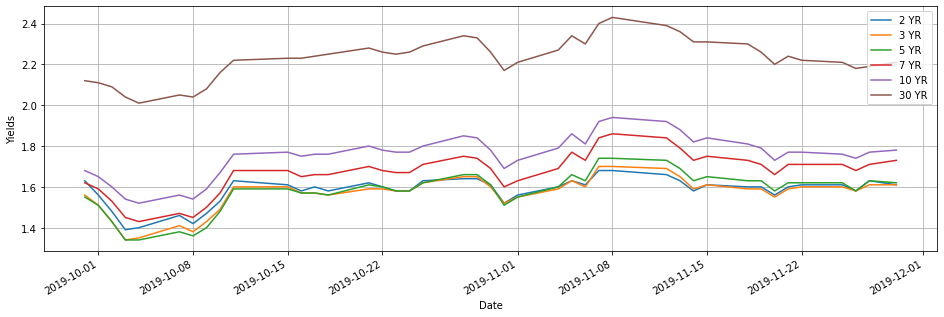

In [17]:
treasury_df.plot(ylabel='Yields', grid=True, figsize=(16,5))
plt.show()

<b>4.2) On a separate graph, plot the gold ETF prices (not returns!) for the 2 months.  Use the left-side axis for the price label.</b>

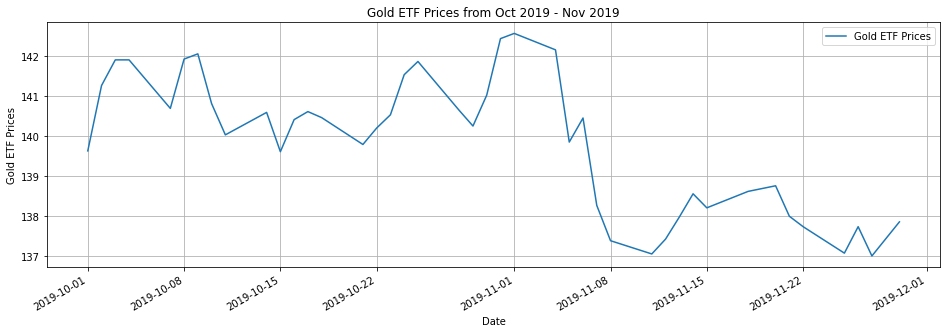

In [18]:
y_axis_label = 'Gold ETF Prices'
gold_etf_df.rename(columns={'Adj Close': y_axis_label})\
        .plot(y=y_axis_label, ylabel=y_axis_label, grid=True, figsize=(16,5),
              title='Gold ETF Prices from Oct 2019 - Nov 2019')
plt.show()

<b>4.3) On the same graph, plot the equity ETF prices (not returns!) for the 2 months.  Be sure to use a separate scale, and the right-side axis for the price label.</b>

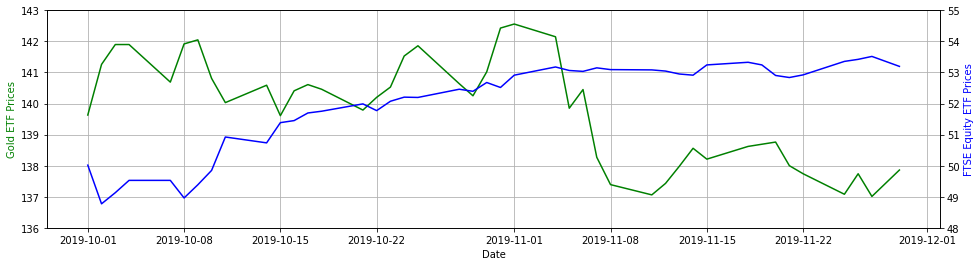

In [19]:
fig, ax1 = plt.subplots(figsize=(16,4))
ax2 = ax1.twinx()
ax1.plot(gold_etf_df.index, gold_etf_df['Adj Close'], 'g-')
ax2.plot(equity_etf_df.index, equity_etf_df['Adj Close'], 'b-')

ax1.grid(True)
ax1.set_xlabel('Date')
ax1.set_ylabel(y_axis_label, color='g')
ax1.set_ylim(136,143)
ax2.set_ylabel('FTSE Equity ETF Prices', color='b')
ax2.set_ylim(48,55)

plt.show()

# 5 Fitting the Yield Curve

<b>5.1) Use either Nelson-Siegel, or Nelson-Siegel-Svensson to fit the Yield Curve.  Write out the equation.</b>

<u>Equation for Nelson-Siegel Curve:</u>

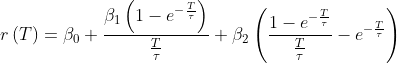

<b>5.2) Fit the Nielson-Siegel yield curve each day using the 6 benchmark yields for the October data</b>

In [20]:
tnote_avg_yields_df[['Oct 2019 Avg Yield']]

,Oct 2019 Avg Yield
2 YR US T-Note,1.551364
3 YR US T-Note,1.528182
5 YR US T-Note,1.525000
7 YR US T-Note,1.615000
10 YR US T-Note,1.706818
30 YR US T-Note,2.190455


In [21]:
maturities = np.array([int(colname.split(' ')[0]) for colname in treasury_df.columns])
ns_curve_oct, _ = calibrate_ns_ols(maturities, tnote_avg_yields_df['Oct 2019 Avg Yield'])
ns_curve_oct

NelsonSiegelCurve(beta0=2.5349155574650304, beta1=-0.8131506293836328, beta2=-1.8864997400961871, tau=3.8431243405052506)

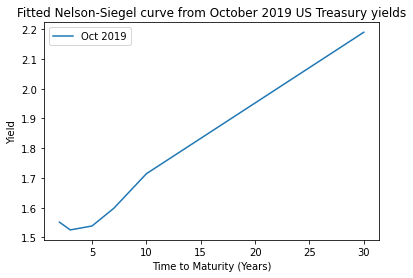

In [22]:
plt.plot(maturities, ns_curve_oct(maturities), label='Oct 2019')
plt.title('Fitted Nelson-Siegel curve from October 2019 US Treasury yields')
plt.ylabel('Yield')
plt.xlabel('Time to Maturity (Years)')
plt.legend()
plt.show()

<b>5.3) Fit the Nielson-Siegel yield curve each day using the 6 benchmark yields for the November data</b>

In [23]:
tnote_avg_yields_df[['Nov 2019 Avg Yield']]

,Nov 2019 Avg Yield
2 YR US T-Note,1.612632
3 YR US T-Note,1.612105
5 YR US T-Note,1.639474
7 YR US T-Note,1.735789
10 YR US T-Note,1.812105
30 YR US T-Note,2.280526


In [24]:
ns_curve_nov, _ = calibrate_ns_ols(maturities, tnote_avg_yields_df['Nov 2019 Avg Yield'])
ns_curve_nov

NelsonSiegelCurve(beta0=2.6547839814282885, beta1=-0.9992538144858261, beta2=-1.4350009070418794, tau=4.654241619072046)

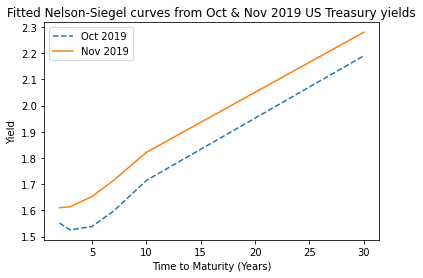

In [25]:
plt.plot(maturities, ns_curve_oct(maturities), linestyle='--', label='Oct 2019')
plt.plot(maturities, ns_curve_nov(maturities), label='Nov 2019')
plt.title('Fitted Nelson-Siegel curves from Oct & Nov 2019 US Treasury yields')
plt.ylabel('Yield')
plt.xlabel('Time to Maturity (Years)')
plt.legend()
plt.show()

# 6 Modelling Prices

<b>6.1) Using the October gold ETF prices, run an ARIMA model with your choice of parameters.</b>

In [26]:
gold_oct_df = gold_etf_df[:'2019-10-31']
gold_oct_df

,Open,High,Low,Close,Adj Close,Volume,Daily Returns
Date,,,,,,,
2019-10-01,138.070007,140.190002,137.800003,139.630005,139.630005,12476200,0.005473
2019-10-02,140.789993,141.880005,140.460007,141.259995,141.259995,11914300,0.011674
2019-10-03,141.360001,143.250000,141.289993,141.899994,141.899994,12396100,0.004531
2019-10-04,141.479996,142.309998,141.139999,141.899994,141.899994,9651000,0.000000
2019-10-07,141.160004,141.770004,140.240005,140.690002,140.690002,6127200,-0.008527
...,...,...,...,...,...,...,...
2019-10-25,142.789993,142.830002,141.399994,141.860001,141.860001,6011500,0.002332
2019-10-28,141.250000,141.250000,140.399994,140.639999,140.639999,5442000,-0.008600
2019-10-29,140.000000,140.630005,139.779999,140.250000,140.250000,3835400,-0.002773


In [27]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(gold_oct_df['Adj Close'], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                   22
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -24.457
Method:                       css-mle   S.D. of innovations              0.716
Date:                Mon, 27 Sep 2021   AIC                             62.914
Time:                        02:54:15   BIC                             70.551
Sample:                    10-02-2019   HQIC                            64.713
                         - 10-31-2019                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0294      0.077      0.380      0.704      -0.122       0.181
ar.L1.D.Adj Close    -0.1830      0.236     -0.776      0.438      -0.645       0.279
ar.L2.D.Adj Close    -0.

<b>6.2) Using the November gold ETF prices, run an ARIMA model with your choice of parameters.</b>

In [28]:
gold_nov_df = gold_etf_df['2019-11-01':]
gold_nov_df

,Open,High,Low,Close,Adj Close,Volume,Daily Returns
Date,,,,,,,
2019-11-01,142.210007,142.899994,142.009995,142.559998,142.559998,8090000,0.000913
2019-11-04,142.259995,142.449997,141.740005,142.149994,142.149994,4740300,-0.002876
2019-11-05,140.649994,140.889999,139.380005,139.850006,139.850006,11782300,-0.016180
2019-11-06,140.119995,140.789993,140.000000,140.449997,140.449997,6416500,0.004290
2019-11-07,140.110001,140.199997,137.600006,138.270004,138.270004,15214200,-0.015521
...,...,...,...,...,...,...,...
2019-11-22,138.369995,138.460007,137.660004,137.740005,137.740005,3620300,-0.001884
2019-11-25,137.320007,137.619995,136.990005,137.080002,137.080002,6415800,-0.004792
2019-11-26,136.979996,137.800003,136.580002,137.740005,137.740005,4724400,0.004815


In [29]:
from statsmodels.tsa.arima_model import ARIMA

# 5,1,0 ARIMA Model
model = ARIMA(gold_nov_df['Adj Close'], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                   19
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -21.461
Method:                       css-mle   S.D. of innovations              0.730
Date:                Mon, 27 Sep 2021   AIC                             56.921
Time:                        02:54:15   BIC                             63.532
Sample:                             1   HQIC                            58.040
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2378      0.201     -1.181      0.237      -0.632       0.157
ar.L1.D.Adj Close    -0.0839      0.242     -0.346      0.729      -0.559       0.391
ar.L2.D.Adj Close     0.

<b>6.3) Using the October equity ETF prices, run an ARMA model with your choice of parameters.</b>

In [30]:
equity_oct_df = equity_etf_df[:'2019-10-31']
equity_oct_df

,Open,High,Low,Close,Adj Close,Volume,Daily Returns
Date,,,,,,,
2019-10-01,53.430000,53.450001,52.930000,53.020000,50.017326,6793900,-0.011005
2019-10-02,52.169998,52.189999,51.619999,51.700001,48.772083,5786200,-0.024896
2019-10-03,51.759998,52.080002,51.509998,52.080002,49.130562,3537800,0.007350
2019-10-04,52.150002,52.520000,52.090000,52.500000,49.526772,2642200,0.008064
2019-10-07,52.490002,52.770000,52.490002,52.500000,49.526772,3675100,0.000000
...,...,...,...,...,...,...,...
2019-10-25,55.150002,55.369999,55.110001,55.330002,52.196503,4908100,-0.000181
2019-10-28,55.490002,55.639999,55.419998,55.610001,52.460648,1604900,0.005061
2019-10-29,55.330002,55.580002,55.279999,55.540001,52.394611,1895300,-0.001259


In [31]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(equity_oct_df['Adj Close'], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                   22
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -10.628
Method:                       css-mle   S.D. of innovations              0.381
Date:                Mon, 27 Sep 2021   AIC                             35.255
Time:                        02:54:15   BIC                             42.893
Sample:                    10-02-2019   HQIC                            37.054
                         - 10-31-2019                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1164      0.092      1.268      0.205      -0.064       0.296
ar.L1.D.Adj Close    -0.0529      0.274     -0.193      0.847      -0.589       0.483
ar.L2.D.Adj Close    -0.

<b>6.4) Using the November equity ETF prices, run an ARMA model with your choice of parameters.</b>

In [32]:
equity_nov_df = equity_etf_df['2019-11-01':]
equity_nov_df

,Open,High,Low,Close,Adj Close,Volume,Daily Returns
Date,,,,,,,
2019-11-01,55.880001,56.090000,55.869999,56.090000,52.913464,3905900,0.007544
2019-11-04,56.480000,56.549999,56.270000,56.369999,53.177605,2093200,0.004992
2019-11-05,56.240002,56.270000,56.099998,56.250000,53.064407,3398400,-0.002129
2019-11-06,56.299999,56.360001,56.139999,56.220001,53.036102,2653300,-0.000533
2019-11-07,56.470001,56.490002,56.279999,56.340000,53.149303,3775500,0.002134
...,...,...,...,...,...,...,...
2019-11-22,56.250000,56.259998,55.990002,56.099998,52.922894,4281900,0.001607
2019-11-25,56.349998,56.560001,56.349998,56.560001,53.356850,3225500,0.008200
2019-11-26,56.540001,56.660000,56.520000,56.630001,53.422886,1917900,0.001238


In [33]:
from statsmodels.tsa.arima_model import ARIMA

# 5,1,0 ARIMA Model
model = ARIMA(equity_nov_df['Adj Close'], order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                   19
Model:                 ARIMA(1, 1, 0)   Log Likelihood                   5.040
Method:                       css-mle   S.D. of innovations              0.186
Date:                Mon, 27 Sep 2021   AIC                             -4.080
Time:                        02:54:15   BIC                             -1.247
Sample:                             1   HQIC                            -3.600
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0143      0.048      0.298      0.766      -0.080       0.108
ar.L1.D.Adj Close     0.1187      0.257      0.463      0.644      -0.384       0.622
                        

<div class="alert alert-block alert-success">
<b>6.4) In each case, justify which model is best:</b> The best model is....<br>
<b>6.5) What are the significant changes, if any?  Be specific with regards to the values of the parameters:</b> 

</div>    

# 7 Modelling Volatility

<b>7.1) Using gold ETF prices, find the daily high minus low for each month.  Compute the average for October.  Compute the average for November.</b>

In [34]:
print(":: Average daily high minus low of Gold ETF Returns ::")
print("Oct 2019:", (gold_oct_df['High'] - gold_oct_df['Low']).mean())
print("Nov 2019:", (gold_nov_df['High'] - gold_nov_df['Low']).mean())

:: Average daily high minus low of Gold ETF Returns ::
Oct 2019: 1.081305462381114
Nov 2019: 0.97249755859375


<b>7.2) Using the gold ETF returns, find the standard deviation for October.  Repeat for November.</b>

In [35]:
print(":: Standard Deviation of Gold ETF Returns ::")

print("Oct 2019:", gold_oct_df['Daily Returns'].std())
print("Nov 2019:", gold_nov_df['Daily Returns'].std())

:: Standard Deviation of Gold ETF Returns ::
Oct 2019: 0.006105665863245679
Nov 2019: 0.006187936827514913


<b>7.3) Using the October gold ETF returns, find a GARCH(1,1) model.  Repeat for November.</b>

In [36]:
class garchOneOne(object):
    
    def __init__(self, logReturns):
        self.logReturns = logReturns * 100
        self.sigma_2 = self.garch_filter(self.garch_optimization())
        self.coefficients = self.garch_optimization()
        
    def garch_filter(self, parameters):
        "Returns the variance expression of a GARCH(1,1) process."
        
        # Slicing the parameters list
        omega = parameters[0]
        alpha = parameters[1]
        beta = parameters[2]
        
        # Length of logReturns
        length = len(self.logReturns)
        
        # Initializing an empty array
        sigma_2 = np.zeros(length)
        
        # Filling the array, if i == 0 then uses the long term variance.
        for i in range(length):
            if i == 0:
                sigma_2[i] = omega / (1 - alpha - beta)
            else:
                sigma_2[i] = omega + alpha * self.logReturns[i-1]**2 + beta * sigma_2[i-1]
        
        return sigma_2 
        
    def garch_loglikelihood(self, parameters):
        "Defines the log likelihood sum to be optimized given the parameters."
        length = len(self.logReturns)
        
        sigma_2 = self.garch_filter(parameters)
        
        loglikelihood = - np.sum(-np.log(sigma_2) - self.logReturns**2 / sigma_2)
        
        return loglikelihood
    
    def garch_optimization(self):
        "Optimizes the log likelihood function and returns estimated coefficients"
        # Parameters initialization
        parameters = [.1, .05, .92]
        
        # Parameters optimization, scipy does not have a maximize function, so we minimize the opposite of the equation described earlier
        opt = scipy.optimize.minimize(self.garch_loglikelihood, parameters,
                                     bounds = ((.001,1),(.001,1),(.001,1)))
        
        variance = .01**2 * opt.x[0] / (1 - opt.x[1] - opt.x[2])   # Times .01**2 because it concerns squared returns
        
        return np.append(opt.x, variance)


Fitting a GARCH(1,1) model for october

In [37]:
gold_oct_df['log_returns'] = np.log(gold_oct_df['Adj Close'] / gold_oct_df['Open'])

# Estimation using our previously coded classes
modelGLDOct = garchOneOne(gold_oct_df['log_returns'])

# Fitting using the arch_model package
arch_mGLD_Oct = arch_model(gold_oct_df['log_returns'] * 100, mean = 'Zero', vol = 'GARCH')
arch_mGLD_Oct = arch_mGLD_Oct.fit()

# Extracting confidence intervals
conf_int_GLD_Oct = pd.DataFrame(arch_mGLD_Oct.conf_int(alpha = .2))

# Creating the test
conf_int_GLD_Oct['garchOneOne'] = modelGLDOct.coefficients[:-1]
conf_int_GLD_Oct['Test'] = np.where(conf_int_GLD_Oct['garchOneOne'] < conf_int_GLD_Oct['upper'], np.where(conf_int_GLD_Oct['garchOneOne'] > conf_int_GLD_Oct['lower'], "Ok", "Not ok"), "Not ok") 

Iteration:      1,   Func. Count:      5,   Neg. LLF: 10141524.202054914
Iteration:      2,   Func. Count:     10,   Neg. LLF: 25.658169386726115
Iteration:      3,   Func. Count:     15,   Neg. LLF: 13.366876158180327
Iteration:      4,   Func. Count:     20,   Neg. LLF: 11.00002227886684
Iteration:      5,   Func. Count:     24,   Neg. LLF: 10.995504705545269
Iteration:      6,   Func. Count:     28,   Neg. LLF: 10.995362216462764
Iteration:      7,   Func. Count:     32,   Neg. LLF: 10.995338945654773
Iteration:      8,   Func. Count:     36,   Neg. LLF: 10.995331588505351
Iteration:      9,   Func. Count:     39,   Neg. LLF: 10.995331588503621
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10.995331588505351
            Iterations: 9
            Function evaluations: 39
            Gradient evaluations: 9


In [38]:
arch_mGLD_Oct

                       Zero Mean - GARCH Model Results                        
Dep. Variable:            log_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.043
Vol Model:                      GARCH   Log-Likelihood:               -10.9953
Distribution:                  Normal   AIC:                           27.9907
Method:            Maximum Likelihood   BIC:                           31.3971
                                        No. Observations:                   23
Date:                Mon, Sep 27 2021   Df Residuals:                       23
Time:                        02:54:16   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0269  2.247e-02      1.197      0.231 

Fitting a GARCH(1,1) model for november

In [39]:
gold_nov_df['log_returns'] = np.log(gold_nov_df['Adj Close'] / gold_nov_df['Open'])

# Estimation using our previously coded classes
modelGLDNov = garchOneOne(gold_nov_df['log_returns'])

# Fitting using the arch_model package
arch_mGLD_Nov = arch_model(gold_nov_df['log_returns'] * 100, mean = 'Zero', vol = 'GARCH')
arch_mGLD_Nov = arch_mGLD_Nov.fit()

# Extracting confidence intervals
conf_int_GLD_Nov = pd.DataFrame(arch_mGLD_Nov.conf_int(alpha = .2))

# Creating the test
conf_int_GLD_Nov['garchOneOne'] = modelGLDNov.coefficients[:-1]
conf_int_GLD_Nov['Test'] = np.where(conf_int_GLD_Nov['garchOneOne'] < conf_int_GLD_Nov['upper'], np.where(conf_int_GLD_Nov['garchOneOne'] > conf_int_GLD_Nov['lower'], "Ok", "Not ok"), "Not ok") 

Iteration:      1,   Func. Count:      5,   Neg. LLF: 3313997.910712011
Iteration:      2,   Func. Count:     11,   Neg. LLF: 11.56289238642469
Iteration:      3,   Func. Count:     16,   Neg. LLF: 11.43706916324593
Iteration:      4,   Func. Count:     21,   Neg. LLF: 11.32246996254941
Iteration:      5,   Func. Count:     26,   Neg. LLF: 11.433855079980832
Iteration:      6,   Func. Count:     31,   Neg. LLF: 11.205644389622744
Iteration:      7,   Func. Count:     35,   Neg. LLF: 11.206196047655101
Iteration:      8,   Func. Count:     39,   Neg. LLF: 11.205619639297105
Optimization terminated successfully    (Exit mode 0)
            Current function value: 11.205619639276193
            Iterations: 8
            Function evaluations: 39
            Gradient evaluations: 8


In [40]:
arch_mGLD_Nov

                       Zero Mean - GARCH Model Results                        
Dep. Variable:            log_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.050
Vol Model:                      GARCH   Log-Likelihood:               -11.2056
Distribution:                  Normal   AIC:                           28.4112
Method:            Maximum Likelihood   BIC:                           31.3984
                                        No. Observations:                   20
Date:                Mon, Sep 27 2021   Df Residuals:                       20
Time:                        02:54:16   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.8446e-09  1.504e-02  1.226e-07      1.000 

<div class="alert alert-block alert-success">
<b>7.4) What are the significant changes, if any?  Be specific with regards to the values of the parameters:</b> 

</div>

<b>7.5) Using equity ETF prices, find the daily high minus low for each month.  Compute the average for October.  Compute the average for November.</b>

In [41]:
print(":: Average daily high minus low of FTSE Equity ETF Returns ::")
print("Oct 2019:", (equity_oct_df['High'] - equity_oct_df['Low']).mean())
print("Nov 2019:", (equity_nov_df['High'] - equity_nov_df['Low']).mean())

:: Average daily high minus low of FTSE Equity ETF Returns ::
Oct 2019: 0.371739097263502
Nov 2019: 0.23600006103515625


<b>7.6) Using equity ETF returns, find the standard deviation for October.  Repeat for November.</b>

In [42]:
print(":: Standard Deviation of FTSE Equity ETF Returns ::")

print("Oct 2019:", equity_oct_df['Daily Returns'].std())
print("Nov 2019:", equity_nov_df['Daily Returns'].std())

:: Standard Deviation of FTSE Equity ETF Returns ::
Oct 2019: 0.009298045053641981
Nov 2019: 0.003871252213527367


<b>7.7) Using October equity ETF returns, find a GARCH(1,1) model.  Repeat for November (3 points).</b>

Fitting a GARCH(1,1) model for October 2019

In [43]:
equity_oct_df['log_returns'] = np.log(equity_oct_df['Adj Close'] / equity_oct_df['Open'])

# Estimation using our previously coded classes
modelFTSEOct = garchOneOne(equity_oct_df['log_returns'])

# Fitting using the arch_model package
arch_mFTSE_Oct = arch_model(equity_oct_df['log_returns'] * 100, mean = 'Zero', vol = 'GARCH')
arch_mFTSE_Oct = arch_mFTSE_Oct.fit()

# Extracting confidence intervals
conf_int_FTSE_Oct = pd.DataFrame(arch_mFTSE_Oct.conf_int(alpha = .2))

# Creating the test
conf_int_FTSE_Oct['garchOneOne'] = modelFTSEOct.coefficients[:-1]
conf_int_FTSE_Oct['Test'] = np.where(conf_int_FTSE_Oct['garchOneOne'] < conf_int_FTSE_Oct['upper'], np.where(conf_int_FTSE_Oct['garchOneOne'] > conf_int_FTSE_Oct['lower'], "Ok", "Not ok"), "Not ok") 

Iteration:      1,   Func. Count:      5,   Neg. LLF: 82.04249808076561
Iteration:      2,   Func. Count:     11,   Neg. LLF: 72.76463492431859
Iteration:      3,   Func. Count:     15,   Neg. LLF: 72.76463365525647
Iteration:      4,   Func. Count:     18,   Neg. LLF: 72.76463365524064
Optimization terminated successfully    (Exit mode 0)
            Current function value: 72.76463365525647
            Iterations: 4
            Function evaluations: 18
            Gradient evaluations: 4


In [44]:
arch_mFTSE_Oct

                       Zero Mean - GARCH Model Results                        
Dep. Variable:            log_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.043
Vol Model:                      GARCH   Log-Likelihood:               -72.7646
Distribution:                  Normal   AIC:                           151.529
Method:            Maximum Likelihood   BIC:                           154.936
                                        No. Observations:                   23
Date:                Mon, Sep 27 2021   Df Residuals:                       23
Time:                        02:54:16   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          9.8343     13.672      0.719      0.472 

Fitting a GARCH(1,1) model for november

In [45]:
equity_nov_df['log_returns'] = np.log(equity_nov_df['Adj Close'] / equity_nov_df['Open'])

# Estimation using our previously coded classes
modelFTSENov = garchOneOne(equity_nov_df['log_returns'])

# Fitting using the arch_model package
arch_mFTSE_Nov = arch_model(equity_nov_df['log_returns'] * 100, mean = 'Zero', vol = 'GARCH')
arch_mFTSE_Nov = arch_mFTSE_Nov.fit()

# Extracting confidence intervals
conf_int_FTSE_Nov = pd.DataFrame(arch_mFTSE_Nov.conf_int(alpha = .2))

# Creating the test
conf_int_FTSE_Nov['garchOneOne'] = modelFTSENov.coefficients[:-1]
conf_int_FTSE_Nov['Test'] = np.where(conf_int_FTSE_Nov['garchOneOne'] < conf_int_FTSE_Nov['upper'], np.where(conf_int_FTSE_Nov['garchOneOne'] > conf_int_FTSE_Nov['lower'], "Ok", "Not ok"), "Not ok") 

Iteration:      1,   Func. Count:      5,   Neg. LLF: 63.46854079051175
Iteration:      2,   Func. Count:     11,   Neg. LLF: 63.43780601778752
Iteration:      3,   Func. Count:     15,   Neg. LLF: 63.43775852752003
Iteration:      4,   Func. Count:     18,   Neg. LLF: 63.437758527508386
Optimization terminated successfully    (Exit mode 0)
            Current function value: 63.43775852752003
            Iterations: 4
            Function evaluations: 18
            Gradient evaluations: 4


In [46]:
arch_mFTSE_Nov

                       Zero Mean - GARCH Model Results                        
Dep. Variable:            log_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.050
Vol Model:                      GARCH   Log-Likelihood:               -63.4378
Distribution:                  Normal   AIC:                           132.876
Method:            Maximum Likelihood   BIC:                           135.863
                                        No. Observations:                   20
Date:                Mon, Sep 27 2021   Df Residuals:                       20
Time:                        02:54:16   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         16.6561     22.422      0.743      0.458 

<div class="alert alert-block alert-success">
<b>7.8) What are the significant changes, if any?  Be specific with regards to the values of the parameters:</b> 

</div>

# 8 Correlation

<b>8.1) Compute the Pearson correlation between the gold and equity returns in October 2019.  Repeat for November 2019. </b>

In [47]:
from scipy.stats import pearsonr
corr_oct, _ = pearsonr(gold_oct_df['Daily Returns'], equity_oct_df['Daily Returns'])
corr_nov, _ = pearsonr(gold_nov_df['Daily Returns'], equity_nov_df['Daily Returns'])

print(':: Pearson Correlation between Gold ETF and Equity ETF Returns ::')
print('Oct 2019:', corr_oct)
print('Nov 2019:', corr_nov)

:: Pearson Correlation between Gold ETF and Equity ETF Returns ::
Oct 2019: -0.631526167607064
Nov 2019: -0.18335214467838024


<div class="alert alert-block alert-success">
<b>Interpret the results as a group and include the answer in the html document for this question.  The interpretation should discuss the degree of correlation, and if it is affected by extreme returns:</b> 

We see a stronger negative correlation between Gold ETF and FTSE Equity ETF in the month of October 2019. However, in November 2019, the correlation became much weaker.
</div>

**Appendix: Correlation between Gold ETF and US 2 YR T-Note yields**

In [48]:
tnote_returns = treasury_df['2 YR'].pct_change()[1:]
gold_vs_tnote = gold_etf_df['Daily Returns'].to_frame().join(tnote_returns, how='right')
gold_vs_tnote

,Daily Returns,2 YR
Date,,
2019-10-01,0.005473,-0.042945
2019-10-02,0.011674,-0.051282
2019-10-03,0.004531,-0.060811
2019-10-04,0.000000,0.007194
2019-10-07,-0.008527,0.042857
...,...,...
2019-11-22,-0.001884,0.006250
2019-11-25,-0.004792,0.000000
2019-11-26,0.004815,-0.018634


In [49]:
gold_tnote_oct = gold_vs_tnote[:'2019-10-31']
gold_tnote_nov = gold_vs_tnote['2019-11-01':]

corr_gold_tnote_oct, _ = pearsonr(gold_tnote_oct['Daily Returns'], gold_tnote_oct['2 YR'])
corr_gold_tnote_nov, _ = pearsonr(gold_tnote_nov['Daily Returns'], gold_tnote_nov['2 YR'])

print(':: Pearson Correlation between Gold ETF and 2 YR T-Note Returns ::')
print('Oct 2019:', corr_gold_tnote_oct)
print('Nov 2019:', corr_gold_tnote_nov)

:: Pearson Correlation between Gold ETF and 2 YR T-Note Returns ::
Oct 2019: -0.7140834644204703
Nov 2019: -0.73118772030372
